  ## 3.1 Pmf
  - 確率質量関数 Probability mass function

In [1]:
import thinkplot
import numpy as np
import nsfg
import thinkstats2
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [2]:
# Pmf は正規化されているため全体の確率は１
pmf.Total()

1.0

In [3]:
# ブラケット演算子で確率を取得できる
pmf[2]

0.4

In [4]:
# ある値の確率だけ変更することも可能
pmf.Incr(2, 0.2)
pmf

Pmf({1: 0.2, 2: 0.6000000000000001, 3: 0.2, 5: 0.2})

In [5]:
# その場合、total は１にならない
pmf.Total()

1.2

In [6]:
# total を１にするには 再び正規化する必要がある
pmf.Normalize()
pmf.Total()

1.0000000000000002

  ## 3.2 Pmf をプロット

In [7]:
# preg の読み込み
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [8]:
# 第1子と第2子以降に分ける
tmp = live.copy()
tmp.loc[tmp.prglngth <= 27] = np.nan
tmp.loc[tmp.prglngth > 47] = np.nan
firsts = tmp[tmp.birthord == 1]
others = tmp[tmp.birthord != 1]
first_pmf = thinkstats2.Pmf(firsts.prglngth)
others_pmf = thinkstats2.Pmf(others.prglngth)

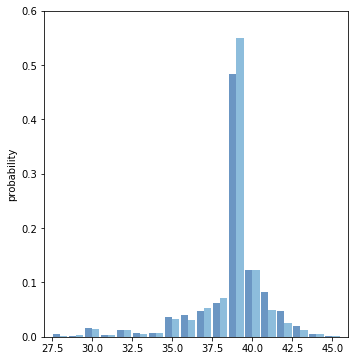

<Figure size 576x432 with 0 Axes>

In [9]:
# 棒グラフ表示
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.Config(xlabl='week', ylabel='probability', axis=[27, 46, 0, 0.6])
thinkplot.show()

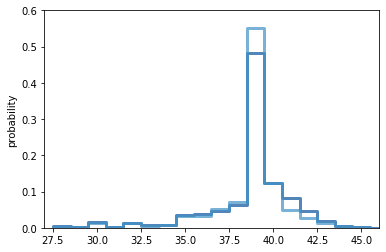

<Figure size 576x432 with 0 Axes>

In [10]:
# ステップ関数表示
thinkplot.PrePlot(2)
thinkplot.Pmfs([first_pmf, others_pmf])
thinkplot.show(xlabl='week', ylabel='probability', axis=[27, 46, 0, 0.6])

 ## 3.3 その他の可視化

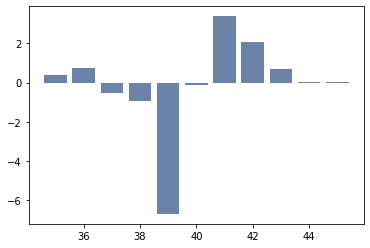

In [11]:
# 差を棒グラフで表示
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = others_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

 ## 3.4 クラスサイズのパラドックス

In [12]:
d = {7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}
pmf = thinkstats2.Pmf(d, label='actual')
print('mean of the actual pmf:', pmf.Mean())

mean of the actual pmf: 23.692307692307693


In [13]:
def BiasPmf(pmf, label):
    """バイアスされたPmfを推定する
    
    Arguments:
        pmf {Pmf} -- actual pmf
        label {string} -- label
    
    Returns:
        Pmf -- バイアスされたPmf
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf


mean of the biased pmf: 29.123376623376625


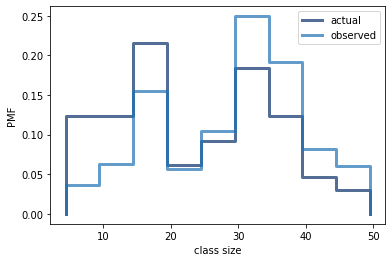

<Figure size 576x432 with 0 Axes>

In [14]:
# バイアスした分布を計算
biased_pmf = BiasPmf(pmf, label='observed')
print('mean of the biased pmf:', biased_pmf.Mean())
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.show(xlabel='class size', ylabel='PMF')

In [15]:


def UnbiasPmf(pmf, label):
    """Pmfからバイアスを取り除く
    
    Arguments:
        pmf {Pmf} -- pmf
        label {string} -- label
    
    Returns:
        Pmf -- バイアスを取り除いたPmf
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)

    new_pmf.Normalize()
    return new_pmf



mean of the unbiased pmf: 23.69230769230769


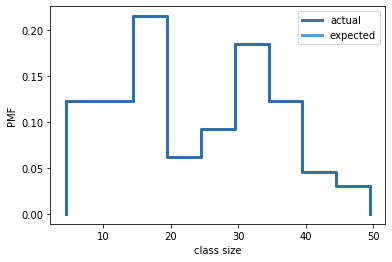

<Figure size 576x432 with 0 Axes>

In [16]:
# バイアスした分布からバイアスを取り除く
unbiased_pmf = UnbiasPmf(biased_pmf, 'expected')
print('mean of the unbiased pmf:', unbiased_pmf.Mean())
thinkplot.Pmfs([pmf, unbiased_pmf])
thinkplot.show(xlabel='class size', ylabel='PMF')

 ## 3.5 DataFrame のインデックス処理

In [17]:
# NumPy 配列からDataFrameを作成 
import numpy as np
import pandas

array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df 

,0,1
0,0.531691,-0.089943
1,-0.510821,1.318533
2,0.589825,0.698789
3,-1.473838,-1.844292


In [18]:
# カラム名を指定して作成
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.531691,-0.089943
1,-0.510821,1.318533
2,0.589825,0.698789
3,-1.473838,-1.844292


In [19]:
# インデックスも指定して作成
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns= columns, index=index)
df

,A,B
a,0.531691,-0.089943
b,-0.510821,1.318533
c,0.589825,0.698789
d,-1.473838,-1.844292


In [20]:
# カラムを選択するとSeries が返される
df['A']

a    0.531691
b   -0.510821
c    0.589825
d   -1.473838
Name: A, dtype: float64

In [21]:
# 行の選択にはlocを用いる
df.loc['a']

A    0.531691
B   -0.089943
Name: a, dtype: float64

In [22]:
# iloc も可
df.iloc[0]

A    0.531691
B   -0.089943
Name: a, dtype: float64

In [23]:
# ラベルのリストも可
indeces = ['a', 'b']
df.loc[indeces]


,A,B
a,0.531691,-0.089943
b,-0.510821,1.318533


In [24]:
# 範囲選択も可
df['a':'c']


,A,B
a,0.531691,-0.089943
b,-0.510821,1.318533
c,0.589825,0.698789


In [25]:
# 整数指定の範囲選択では終端は含まれない
df[0:2]


,A,B
a,0.531691,-0.089943
b,-0.510821,1.318533
